In [74]:
from pathlib import Path
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import Functional_Fusion.util as util
import itertools
from scipy import stats
import os
from scripts.seed_corr import import_ts, correlate_ts, get_conn, get_data, select_regions
import seaborn as sb

base_dir = '/Users/callithrix/Documents/Projects/Degeneration/derivatives/'


In [75]:
ts, rois, subjects, sessions = import_ts()
coefs = correlate_ts(ts)
conn = get_conn(coefs, rois)
d, D = get_data(subjects, sessions, rois, conn)
d, D, regions_contra, regions_ipsi, regions_cortico, regions_cereb = select_regions(
    d, D)
d.to_csv(base_dir + 'data/connectivity.tsv')

/Users/callithrix/code/Python/Functional_Fusion/Functional_Fusion/util.py:117: RuntimeWarning: invalid value encountered in divide
  X = X / np.sqrt(np.nansum(X**2, axis=0)/X.shape[0])


In [76]:
# Set patient and control colours from rgb codes
patient_col = '#BB271A'
control_col = '#153969'
custom_palette = [control_col, patient_col]
sb.set_context('talk')
ylim = (0.12, 0.58)


# Connectivity change

## Vision effect on PPC connectivity

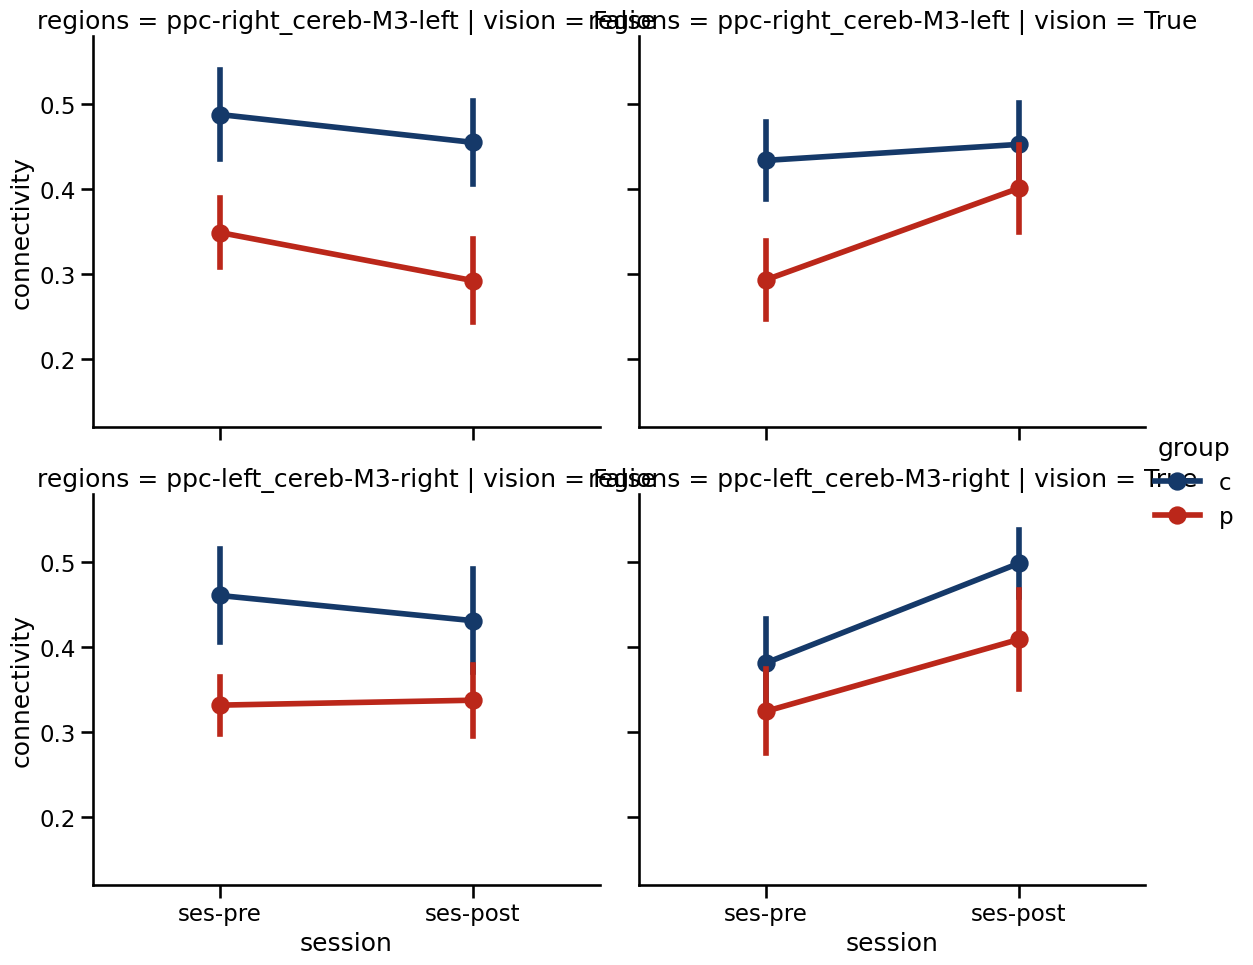

In [108]:
plot_region = ['ppc-left_cereb-M3-right', 'ppc-right_cereb-M3-left']

selected_regions = d['regions'].isin(plot_region)
fig = sb.catplot(x='session', y='connectivity', hue='group',
                  row='regions', col='vision',
                  data=d[selected_regions], kind='point',
                  height=5, aspect=1.2,
                    hue_order=['c', 'p'],
                  errorbar="se", palette=custom_palette)
fig.set(ylim=ylim)
plt.savefig(f'{base_dir}/figures/fig_connectivity_change_ppc.png', dpi=300)

## Vision x Feedback effect on PMD connectivity

In [61]:
d.condition.unique()

array(['PropFB', 'VMFB', 'VM', 'Prop'], dtype=object)

<Figure size 1600x800 with 0 Axes>

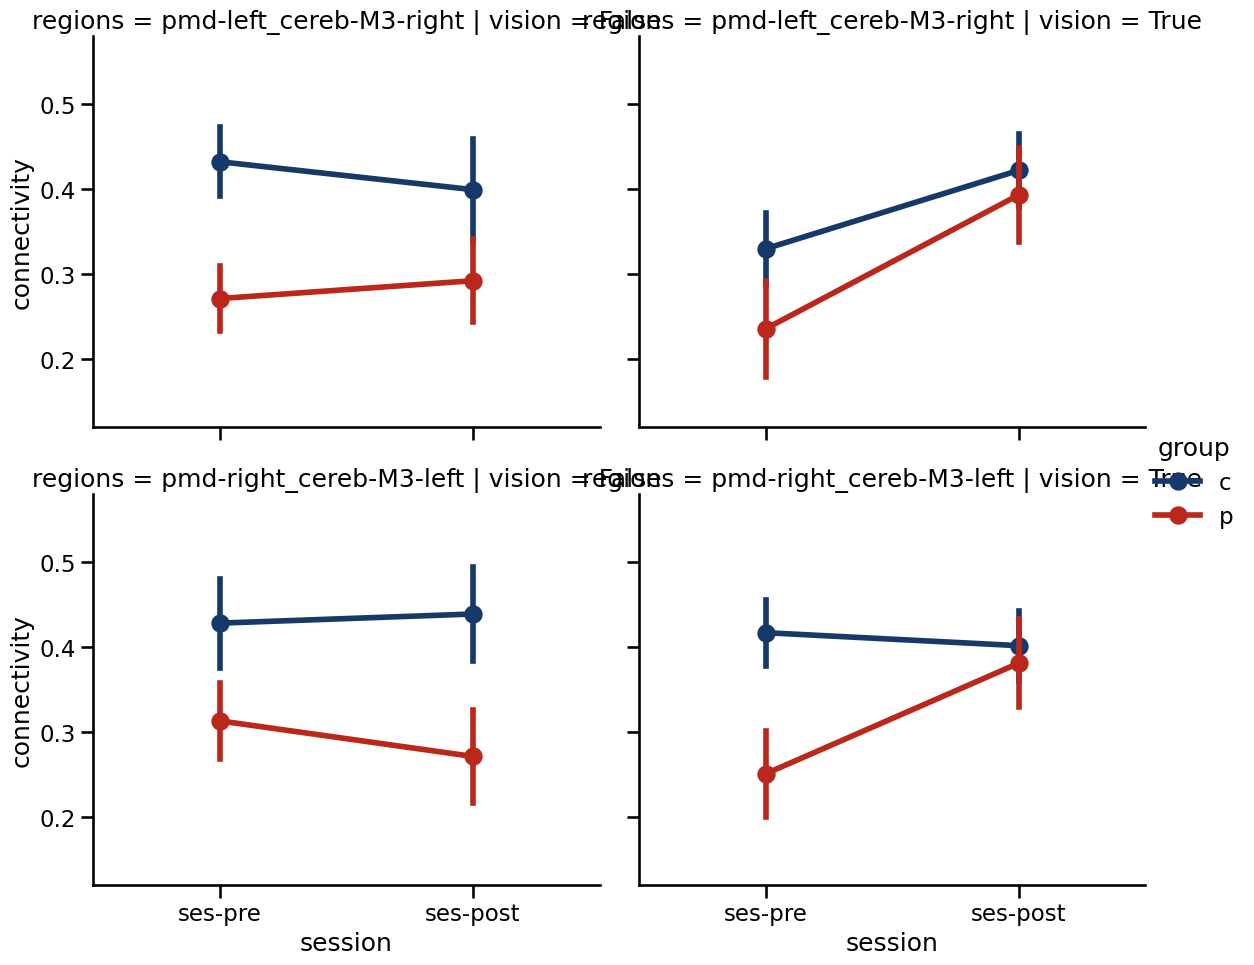

In [107]:
plot_region = ['pmd-left_cereb-M3-right', 'pmd-right_cereb-M3-left']

plt.figure(figsize=[16, 8])
selected_regions = d['regions'].isin(plot_region)
fig = sb.catplot(x='session', y='connectivity', hue='group',
                  row='regions', col='vision',
                  data=d[selected_regions], kind='point',
                  height=5, aspect=1.2,
                  errorbar="se", palette=custom_palette,
                  hue_order=['c', 'p'],
                  row_order=plot_region)
fig.set(ylim=ylim)
plt.savefig(f'{base_dir}/figures/fig_connectivity_change_pmd_vision.png', dpi=300)

## Feedback effect on dlPFC-D2 connectivity

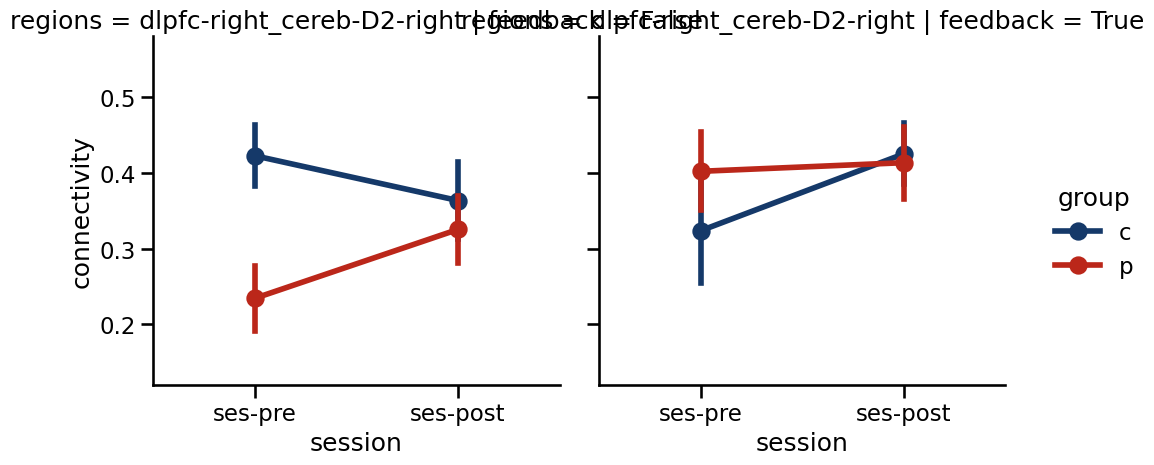

In [109]:
plot_region = ['dlpfc-right_cereb-D2-right']
selected_regions = d['regions'].isin(plot_region)
fig = sb.catplot(x='session', y='connectivity', hue='group',
                  row='regions', col='feedback', data=d[selected_regions], 
                  kind='point', errorbar="se", 
                  height=5, aspect=1,
                  hue_order=['c', 'p'],
                  palette=custom_palette)
fig.set(ylim=ylim)
plt.savefig(f'{base_dir}/figures/fig_connectivity_change_feedback_dlpfc.png', dpi=300)


## Overall connectivity change in M1 hand area - cerebellar hand area

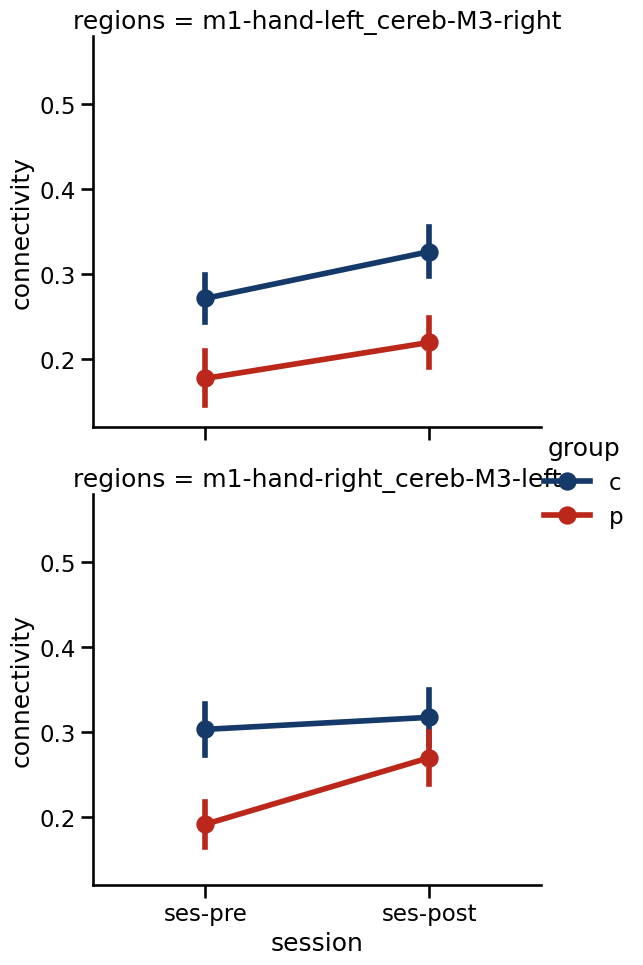

In [110]:
#   - Plot connectivity change by feedback type
selected_regions = d['regions'].isin(['m1-hand-left_cereb-M3-right',
                                      'm1-hand-right_cereb-M3-left'])
fig = sb.catplot(x='session', y='connectivity', hue='group',
                  row='regions',  data=d[selected_regions], 
                  kind='point', errorbar="se",
                    palette=custom_palette, 
                    height=5, aspect=1.2, 
                    hue_order=['c', 'p'],
                    row_order=['m1-hand-left_cereb-M3-right', 'm1-hand-right_cereb-M3-left'])
fig.set(ylim=ylim)
plt.savefig(f'{base_dir}/figures/fig_connectivity_change_overall_m1.png', dpi=300)
